# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
training_set_scaled.shape
#as it has 1258(as it is0-1257) rows therefore the last data is at index 1257 as upper bound is excluded in for loop

(1258, 1)

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

the reshaping operation changes the shape of X_train from (num_samples, num_features) to (num_samples, num_features, 1). This new shape adds an additional dimension to the data. 1 for number of features/indicators here opening price

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(X_train.shape[0] FOR number of rows, X_train.shape[1] for number of columns,1 for number of features/indicators here opening price

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#input shape already takes the batch size or rows so no need to input

D:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# units = 50 for more dimension as stock price trend is complex

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# no return_sequences as it is the final and last lstm layer and no value is returned and default value(sequences) of return_sequences is false

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# RMS prop can be used and recommended usually for RNN
#loss = 'mean_squared_error'is used for regression

### Fitting the RNN to the Training set

too much loss will lead to overfitting , it may perform well in train data but will lead to loss in test data

In [16]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.1144
Epoch 2/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0072
Epoch 3/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0056
Epoch 4/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0056
Epoch 5/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0047
Epoch 6/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0048
Epoch 7/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0058
Epoch 8/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0054
Epoch 9/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0050
Epoch 10/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0040
Epoch 11/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0041
Epoch 12/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0037
Epoch 13/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0040
Epoch 14/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0040
Epoch 15/150
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - l

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  # Lower Bound : till last day
#len(dataset_total) - len(dataset_test) gives Jan 3rd
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)  # fit_transform is not used as it should me same scalled as the training set
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # we use this to get orginal scalled values or orginal values

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


In [19]:
predicted_stock_price

array([[778.34125],
       [775.69415],
       [779.6487 ],
       [780.9337 ],
       [785.3507 ],
       [792.76843],
       [795.9841 ],
       [794.6413 ],
       [794.7092 ],
       [795.46515],
       [796.10126],
       [796.04767],
       [795.87494],
       [796.93805],
       [797.77344],
       [805.91907],
       [813.2026 ],
       [819.2356 ],
       [818.7485 ],
       [807.48254]], dtype=float32)

### Visualising the results

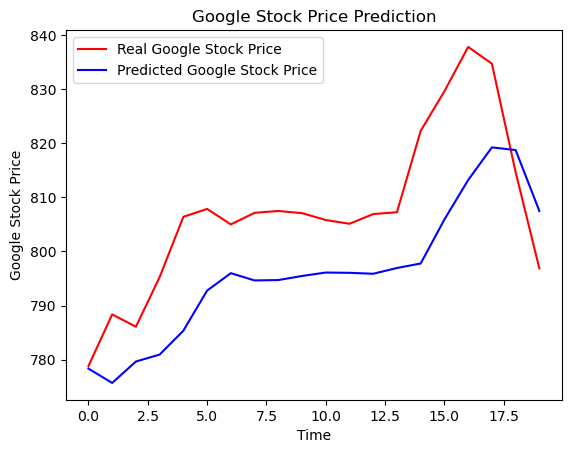

In [32]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.savefig('Google.jpg',dpi=300)
plt.show()

After plt.show() is called, a new figure is created. To deal with this, you can call plt.savefig("your_image.png") before you call plt.show()
With an image of size (9, 6), the absissa legend is cut. An image of size (15, 10) fixes the problem.

In [21]:
regressor.save("Stock_trend_predictor.keras")